<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230705_multi_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 다중분류

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [40]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [43]:
samples = np.random.randint(6000, size=9)
samples

array([3890, 2469, 3487, 1593, 1249, 1117, 2141, 2140, 4148])

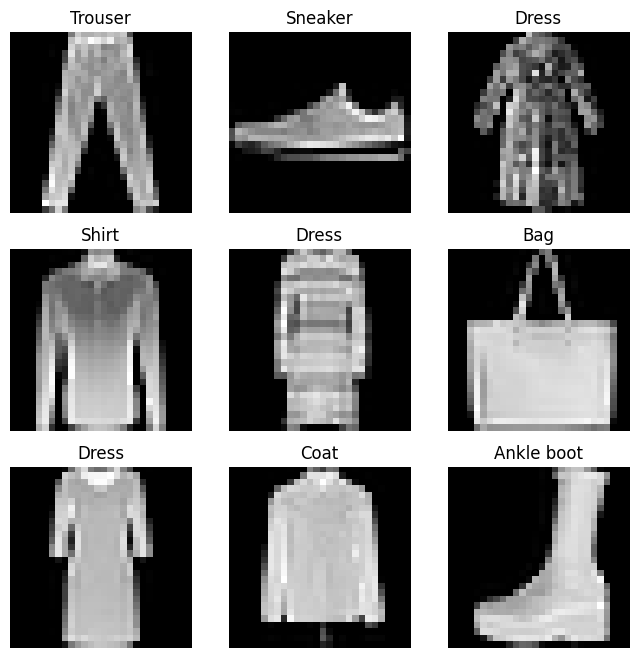

In [44]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_names[y_train[idx]])
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### MinMaxScaling

In [46]:
X_train = X_train/225.
X_val = X_val/255.
X_test = X_test/255.

In [47]:
from keras.utils import to_categorical

y_train_o =  to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [48]:
y_val_o.shape

(12000, 10)

In [49]:
X_train = X_train.reshape(-1, 28*28)# 이미지 데이터를 일열로

In [50]:
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [54]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=256, activation='relu', input_shape=(28*28,)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])# 마지막 layer에는 y_val의 열개수로

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 64)                16448     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
# from keras.optimizers import Adam
# opti = Adam(learning_rate=0.002)

# model.compile(
#     optimizer=opti,
#     loss='categorical_crossentropy',
#     metrics=['accuarcy']
# )

In [56]:
EPOCHS = 30
BATCH = 256

history = model.fit(
    X_train, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val_o),
    verbose = 1
)

Epoch 1/30
188/188 [==============================] - 3s 14ms/step - loss: 0.6102 - accuracy: 0.7865 - val_loss: 0.4416 - val_accuracy: 0.8446
Epoch 2/30
188/188 [==============================] - 2s 13ms/step - loss: 0.4111 - accuracy: 0.8534 - val_loss: 0.4312 - val_accuracy: 0.8492
Epoch 3/30
188/188 [==============================] - 2s 12ms/step - loss: 0.3607 - accuracy: 0.8700 - val_loss: 0.3636 - val_accuracy: 0.8711
Epoch 4/30
188/188 [==============================] - 4s 19ms/step - loss: 0.3294 - accuracy: 0.8802 - val_loss: 0.3616 - val_accuracy: 0.8700
Epoch 5/30
188/188 [==============================] - 3s 13ms/step - loss: 0.3121 - accuracy: 0.8853 - val_loss: 0.3474 - val_accuracy: 0.8743
Epoch 6/30
188/188 [==============================] - 2s 13ms/step - loss: 0.2953 - accuracy: 0.8911 - val_loss: 0.3182 - val_accuracy: 0.8865
Epoch 7/30
188/188 [==============================] - 2s 13ms/step - loss: 0.2796 - accuracy: 0.8971 - val_loss: 0.3228 - val_accuracy: 0.8833

In [57]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

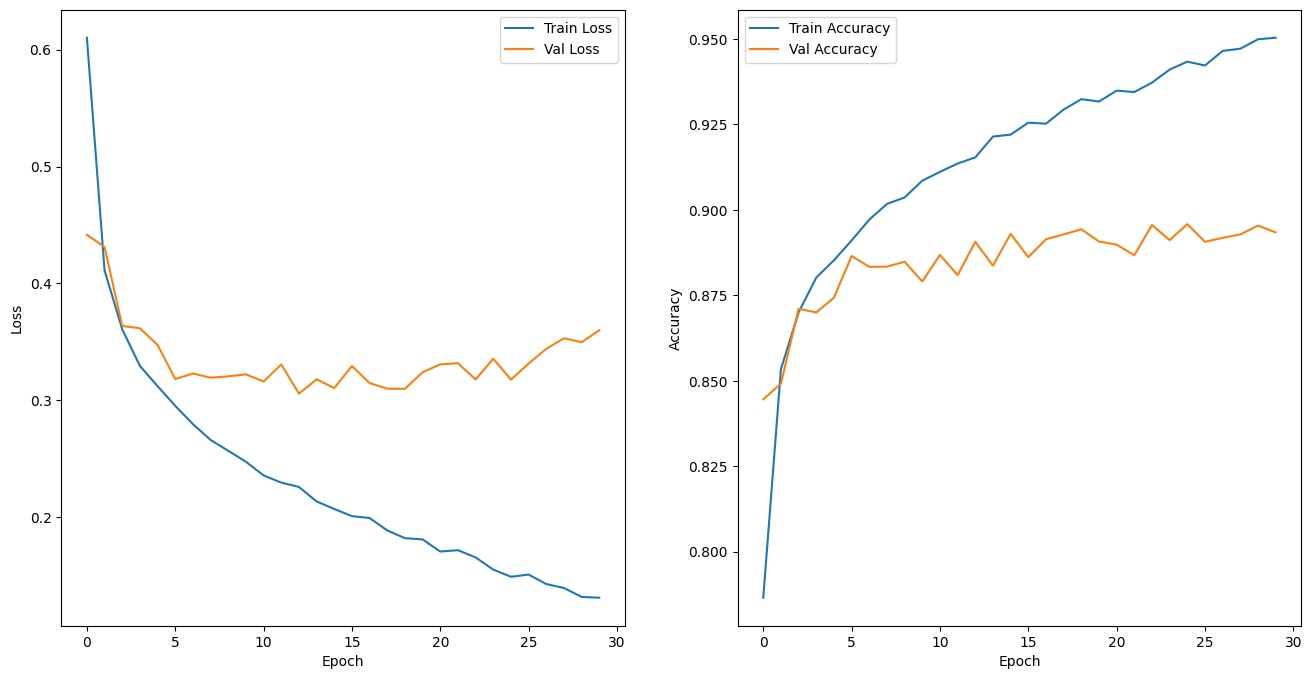

In [58]:
plot_history(history)

In [59]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [60]:
y_pred = np.argmax(y_pred, axis=1)

In [61]:
y_test_o  =to_categorical(y_test)

In [62]:
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.8856


[0.37965643405914307, 0.8855999708175659]

# CNN

이미지와 같은 데이터의 공간적인 특성은 무시된다
- 이미지의 특성을 잘 나타내는 필터를 학습시키는 것이 목표

> 합성곱 신경망
- 이미지의 특징을 추출하여 NN에 적용한다

> convolution
- 필터라고 생각
- 필터의 개수에 다라 z축이 설정된다
(ex) input 6x6x3 -> 출력도 마지막z값은 3

In [63]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [64]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [65]:
EPOCHS = 30
BATCH = 256

history = model.fit(
    X_train, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val_o),
    verbose = 1
)

Epoch 1/30


ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_test_o  =to_categorical(y_test)

In [ ]:
model.evaluate(X_test, y_test_o)

# cnn-cifar

In [66]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [159]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test,y_test) = cifar10.load_data()

In [160]:
X_train.shape

(50000, 32, 32, 3)

In [161]:
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)

In [162]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [163]:
samples = np.random.randint(50000, size=9)
samples

array([15129, 22401, 14181, 14381, 34347, 39966, 11733,  8613, 18117])

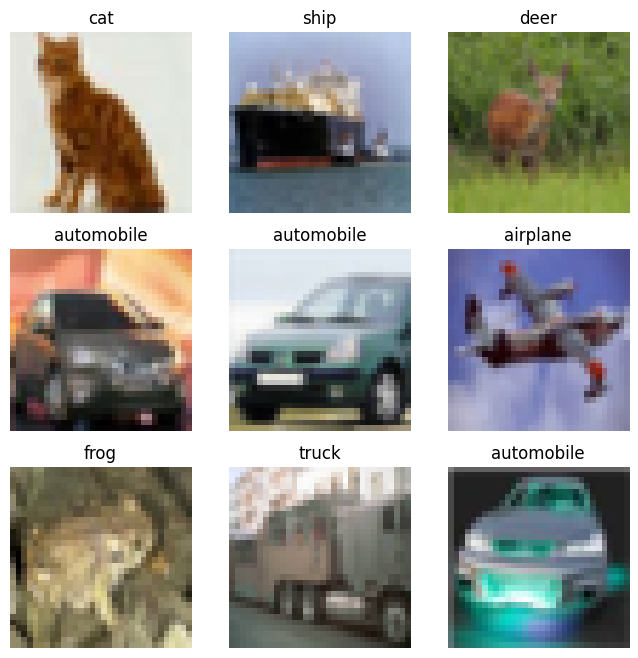

In [164]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx])
    plt.axis('off')
    plt.title(class_names[y_train[idx]])
plt.show()

In [165]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [136]:
# 이미지데이터 스케일링
#타켓값 one_hot encoding
# 모델만들기, 컴파일 학습
# 그래프
# 예측
# 정확도, confusion matrix

In [166]:
X_train = X_train/225.
X_val = X_val/255.
X_test = X_test/255.

In [167]:
from keras.utils import to_categorical

y_train_o =  to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [168]:
y_train_o.shape, y_val_o.shape

((40000, 10), (10000, 10))

In [169]:
X_val.shape, X_train.shape,X_test.shape

((10000, 32, 32, 3), (40000, 32, 32, 3), (10000, 32, 32, 3))

In [170]:
X_val = X_val.reshape(-1, 32,32,3)
X_test = X_test.reshape(-1, 32,32,3)
X_train = X_train.reshape(-1, 32,32,3)
X_val.shape

(10000, 32, 32, 3)

In [171]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [172]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [173]:
EPOCHS = 30
BATCH = 256

history = model.fit(
    X_train, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val_o),
    verbose = 1
)

Epoch 1/30
157/157 [==============================] - 57s 357ms/step - loss: 1.9369 - accuracy: 0.2850 - val_loss: 1.6697 - val_accuracy: 0.3925
Epoch 2/30
157/157 [==============================] - 56s 356ms/step - loss: 1.5386 - accuracy: 0.4432 - val_loss: 1.4767 - val_accuracy: 0.4737
Epoch 3/30
157/157 [==============================] - 60s 380ms/step - loss: 1.4107 - accuracy: 0.4975 - val_loss: 1.4124 - val_accuracy: 0.4989
Epoch 4/30
157/157 [==============================] - 55s 350ms/step - loss: 1.3325 - accuracy: 0.5265 - val_loss: 1.3347 - val_accuracy: 0.5283
Epoch 5/30
157/157 [==============================] - 54s 343ms/step - loss: 1.2689 - accuracy: 0.5531 - val_loss: 1.2625 - val_accuracy: 0.5552
Epoch 6/30
157/157 [==============================] - 54s 344ms/step - loss: 1.2216 - accuracy: 0.5711 - val_loss: 1.2678 - val_accuracy: 0.5623
Epoch 7/30
157/157 [==============================] - 54s 342ms/step - loss: 1.1778 - accuracy: 0.5888 - val_loss: 1.2222 - val_ac

In [174]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

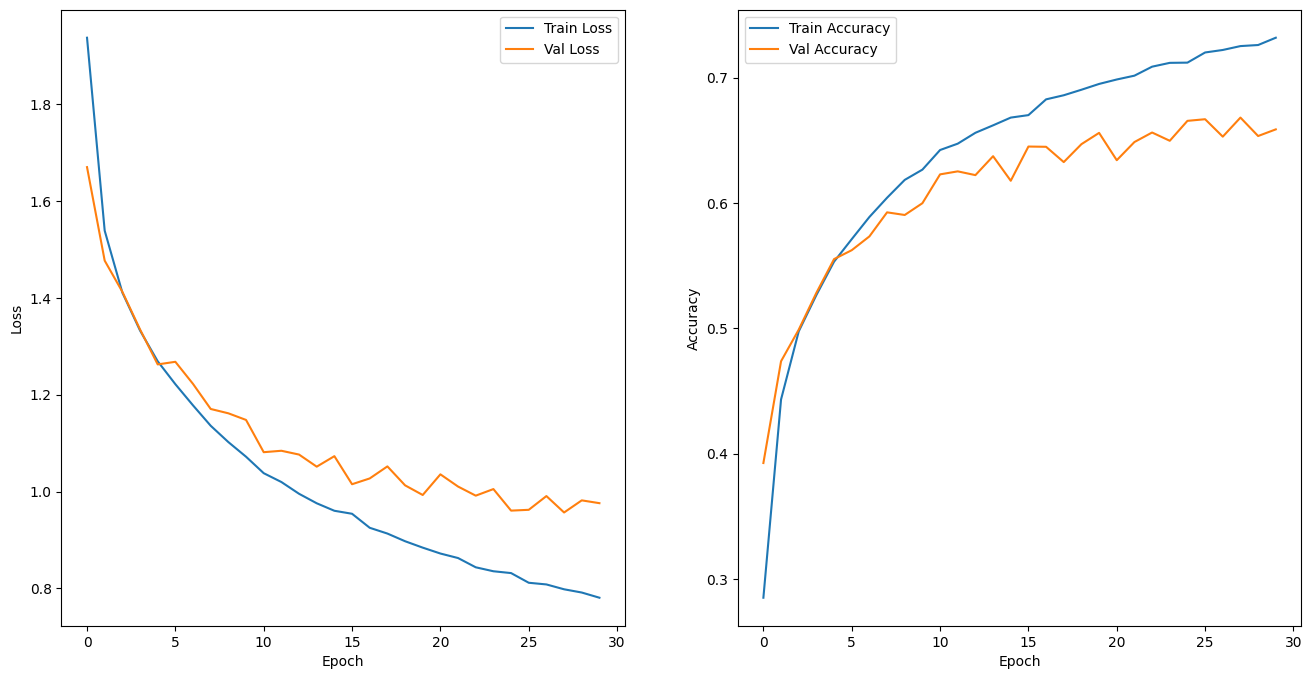

In [175]:
plot_history(history)

In [176]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_o  =to_categorical(y_test)
model.evaluate(X_test, y_test_o)

313/313 [==============================] - 4s 13ms/step - loss: 0.9861 - accuracy: 0.6603


[0.9860618114471436, 0.6603000164031982]

# Early stopping

### callback
어떠한 조건을 달성 하면 학습을 조기 종료한다

In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=5)
ckpt = './ckpt/cifar10.ckpt'
mc = ModelCheckpoint(ckpt, monitor ='val_loss', save_weights_only=True, save_best_only=True, verbose=1)

In [ ]:
EPOCHS = 30
BATCH = 256

history = model.fit(
    X_train, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val_o),
    callbacks=[es, mc],
    verbose = 1
)

In [ ]:
model.load_weights(ckpt)

In [ ]:
model.evaluate(X_test, y_test_o)

In [ ]:
# reduce
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=5)
ckpt = './ckpt/cifar10.ckpt'
mc = ModelCheckpoint(ckpt, monitor ='val_loss', save_weights_only=True, save_best_only=True, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor)